In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as s

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_data = city_data.drop_duplicates('city')
# Check city data
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
pyber_data = city_data.merge(ride_data, on = 'city', how = 'outer')
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
urban_city = pyber_data.loc[(pyber_data["type"] == "Urban")]
suburban_city = pyber_data.loc[(pyber_data["type"] == "Suburban")]
rural_city = pyber_data.loc[(pyber_data["type"] == "Rural")]


# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

## Bubble Plot of Ride Sharing Data

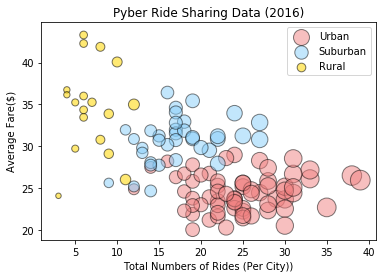

In [5]:
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='upper right')

plt.savefig("Data/Pyber Ride Sharing.png")
plt.show()

## Total Fares by City Type

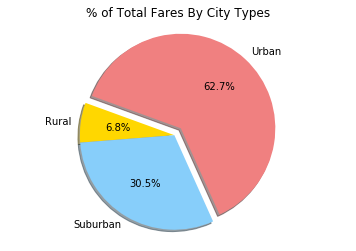

In [6]:

# Calculate Total Fare by City Type# Calcul 
total_fare = pyber_data.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("Data/Pyber Ride Sharing.png")
plt.show()

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

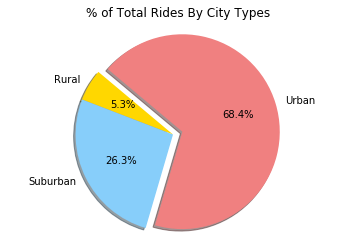

In [8]:
# Calculate Total Fare by City Type
total_rides = pyber_data.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Data/Pyber Ride Sharing pt 2.png")
plt.show()# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

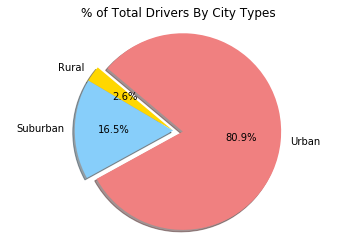

In [10]:

# Calculate Total Drivers by City Type# Calcul 
total_drivers = city_data.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Data/Pyber Ride Sharing pt 3.png")
plt.show()

In [ ]:
# Show Figure
plt.show()